In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSMTIA.utils import mapping, parameter_range
from scipy import stats
import math

In [2]:
chunks = []

for chunk in pd.read_csv("analysis/not_uploaded/SSMTIA_test_scores_unactivated.csv", sep=";", chunksize=100000):
    chunk["scores"] = chunk["scores"].apply(eval)

    chunk["styles_score"] = chunk["scores"].apply(lambda row: row["styles_score"][0]).astype("float16")
    chunk["technical_score"] = chunk["scores"].apply(lambda row: row["technical_score"][0]).astype("float16")
    chunk["composition_score"] = chunk["scores"].apply(lambda row: row["composition_score"][0]).astype("float16")

    chunk["styles_change_strength"] = chunk["scores"].apply(lambda row: row["styles_change_strength"])
    chunk["technical_change_strength"] = chunk["scores"].apply(lambda row: row["technical_change_strength"])
    chunk["composition_change_strength"] = chunk["scores"].apply(lambda row: row["composition_change_strength"])

    chunk = chunk.drop(columns=["scores"])
    chunks.append(chunk)
df = pd.concat(chunks)
del chunks
df

,img,parameter,change,styles_score,technical_score,composition_score,styles_change_strength,technical_change_strength,composition_change_strength
0,pexels-photo-2601199.jpeg,original,0.0,-16.046875,4.421875,4.894531,"[-0.00201416015625, 0.004070281982421875, -0.0...","[-5.6328125, -4.73828125, -6.23046875, -4.3359...","[0.0197296142578125, 0.0011243820190429688, 0...."
1,pexels-photo-2281715.jpeg,original,0.0,-23.000000,1.940430,16.750000,"[-0.11767578125, 0.038055419921875, -0.0467529...","[-4.36328125, -2.984375, -9.0703125, -3.873046...","[-0.0281829833984375, 0.0062103271484375, -0.0..."
2,pexels-photo-1444107.jpeg,original,0.0,0.338379,3.570312,0.521484,"[0.001495361328125, 0.0102081298828125, 0.0007...","[-3.16015625, -3.0625, -1.408203125, -2.148437...","[0.0096282958984375, 0.0025272369384765625, 0...."
3,pexels-photo-3326725.jpeg,original,0.0,2.917969,3.744141,0.312256,"[0.00799560546875, 0.0084381103515625, -0.0137...","[-1.4560546875, -3.859375, -1.9765625, -1.1318...","[0.006500244140625, 0.00799560546875, 0.022109..."
4,pexels-photo-2347378.jpeg,original,0.0,1.548828,-25.687500,0.051697,"[-0.0367431640625, 0.028106689453125, -0.06640...","[-1.2255859375, -0.46728515625, -1.236328125, ...","[-0.006931304931640625, 0.01258087158203125, 0..."
...,...,...,...,...,...,...,...,...,...
2744995,pexels-photo-1228628.jpeg,ratio,5.0,-23.453125,-0.571777,24.390625,"[-0.07373046875, 0.0450439453125, 0.0010528564...","[-7.34765625, -2.376953125, -8.9453125, -6.187...","[-0.0267181396484375, -0.0298919677734375, 0.0..."
2744996,pexels-photo-2300895.jpeg,ratio,5.0,-0.122559,2.199219,0.370850,"[-0.02166748046875, 0.00534820556640625, -0.02...","[-2.271484375, -2.134765625, -0.99072265625, -...","[-0.0086517333984375, -0.0122222900390625, 0.0..."
2744997,pexels-photo-2704927.jpeg,ratio,5.0,0.204224,2.765625,3.804688,"[-0.04925537109375, 0.012298583984375, 0.00569...","[-2.046875, -3.37890625, -2.5625, -1.870117187...","[0.00927734375, -0.00496673583984375, 0.043945..."
2744998,pexels-photo-1033922.jpeg,ratio,5.0,-0.052307,-1.719727,-1.372070,"[-0.0419921875, -0.00344085693359375, -0.02716...","[-1.7041015625, -3.31640625, -2.70703125, -1.7...","[-0.0117950439453125, -0.0012187957763671875, ..."


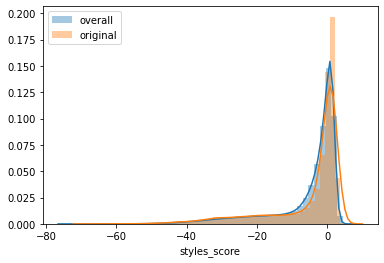

In [3]:
sns.distplot(df["styles_score"], label="overall")
sns.distplot(df[df["parameter"] == "original"]["styles_score"], label="original")
plt.legend()

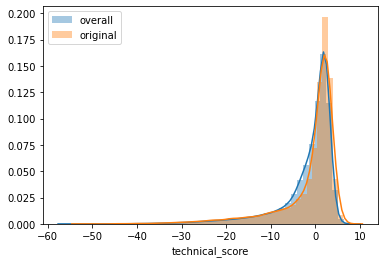

In [4]:
sns.distplot(df["technical_score"], label="overall")
sns.distplot(df[df["parameter"] == "original"]["technical_score"], label="original")
plt.legend()

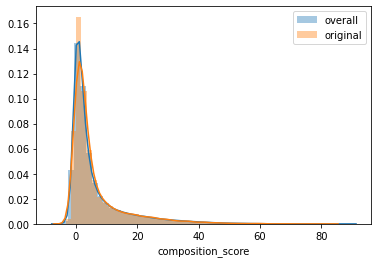

In [5]:
sns.distplot(df["composition_score"], label="overall")
sns.distplot(df[df["parameter"] == "original"]["composition_score"], label="original")
plt.legend()

In [6]:
def histogram_distortion(distortion:str, score:str):
    sns.distplot(df[df["parameter"] == "original"][score], label="original")
    for change in (val for val in mapping["all_changes"] if distortion in val):
        parameter, change = change.split(";")
        sns.distplot(df[(df["parameter"] == parameter) & (df["change"] == float(change))][score], label=f"{parameter}: {change}")
    plt.legend()

In [7]:
def violin_distortion(distortion:str, score:str): # FIXME defaults for shadows, hightlights...
    plot_frame = df[(df["parameter"] == distortion) | (df["parameter"] == "original")]
    sns.violinplot(data=plot_frame, x="change", y=score, color="steelblue")

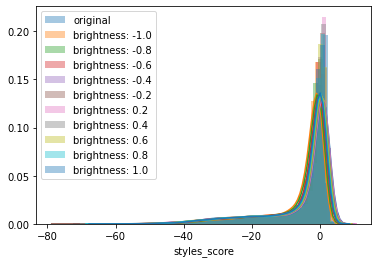

In [8]:
histogram_distortion("brightness", "styles_score")

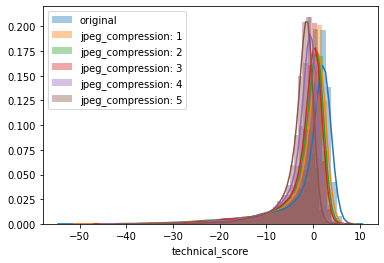

In [9]:
histogram_distortion("jpeg_compression", "technical_score")

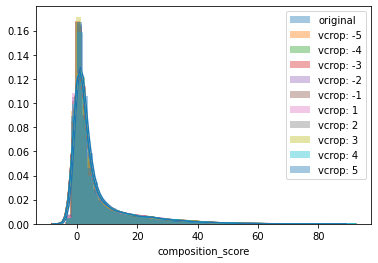

In [10]:
histogram_distortion("vcrop", "composition_score")

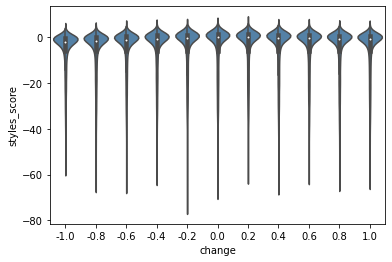

In [11]:
violin_distortion("brightness", "styles_score")

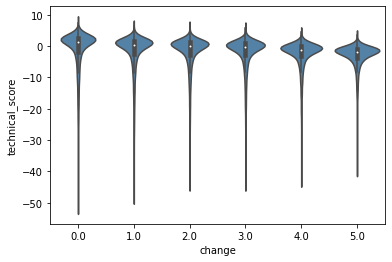

In [12]:
violin_distortion("jpeg_compression", "technical_score")

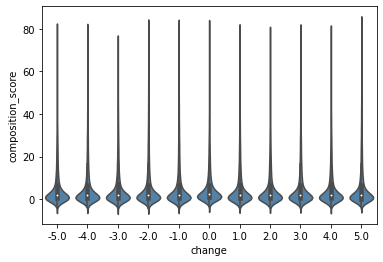

In [13]:
violin_distortion("hcrop", "composition_score")

In [14]:
def calculate_spearman(distortion:str, img_names=df["img"].unique()): # FIXME defaults for shadows, highlights, ...
    corr_l = []
    p_l = []
    for f in img_names:
        corr_df = df[(df["img"] == f) & ((df["parameter"] == distortion) | (df["parameter"] == "original"))][["change", "score"]]
        c, p = stats.spearmanr(corr_df["score"], corr_df["change"])
        corr_l.append(c)
        p_l.append(p)
    return sum(corr_l)/len(corr_l), sum(p_l)/len(p_l)

In [15]:
calculate_spearman("jpeg_compression")

KeyError: "['score'] not in index"